In [46]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array
from matplotlib.image import imread
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from matplotlib.image import imread
import matplotlib.image as mpimg

In [47]:
dim1 = []
dim2 = []
for filename in os.listdir('E:/data/test/' +'dogs/' ):
  img = imread('E:/data/test/' + 'dogs/' + filename)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)
print(np.mean(dim1))
print(np.mean(dim2))

image_size = (385,431,3)

385.9
431.1


In [48]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
from keras.optimizers import SGD
opt = SGD(learning_rate = 0.0001)

model=Sequential()
model.add(Conv2D(32,kernel_size = (5,5),activation='relu',input_shape=image_size))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(64,kernel_size = (5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5))



model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
  optimizer=opt,metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 381, 427, 32)      2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 190, 213, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 190, 213, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 186, 209, 64)      51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 93, 104, 64)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 93, 104, 64)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 619008)           

In [49]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = datagen.flow_from_directory('E:/data/train',
                                                 target_size=image_size[:2],
                                                 class_mode='binary',
                                                 batch_size=32)

test_generator = datagen.flow_from_directory('E:/data/test',
                                                 target_size=image_size[:2],
                                                 class_mode='binary',
                                                 batch_size=32)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


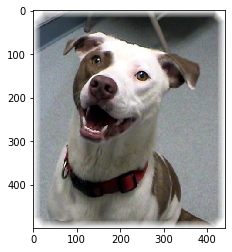

In [50]:
img=mpimg.imread('E:/data/test/dogs/101.jpg')
imgplot = plt.imshow(img)
plt.show()

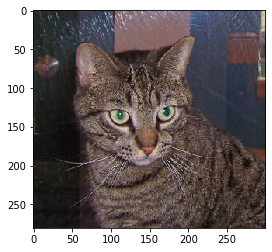

In [51]:
img=mpimg.imread('E:/data/train/cats/1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [52]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience = 3,monitor = 'accuracy')
callbacks = [earlystop]

In [53]:
history = model.fit_generator(train_generator,validation_data = (test_generator),epochs = 5,verbose = 2)

Epoch 1/5
 - 15s - loss: 0.7854 - accuracy: 0.4250 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 2/5
 - 14s - loss: 0.7586 - accuracy: 0.3000 - val_loss: 0.6981 - val_accuracy: 0.4500
Epoch 3/5
 - 15s - loss: 0.6908 - accuracy: 0.6000 - val_loss: 0.6950 - val_accuracy: 0.5500
Epoch 4/5
 - 17s - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6994 - val_accuracy: 0.4000
Epoch 5/5
 - 15s - loss: 0.7324 - accuracy: 0.4750 - val_loss: 0.6964 - val_accuracy: 0.5000


In [54]:
model.evaluate_generator(test_generator)

[0.6917961835861206, 0.5]

[[0.]]
Prediction:  Cat


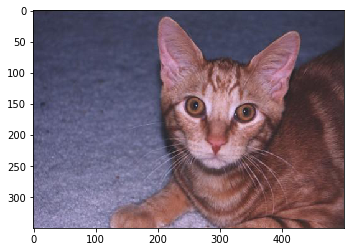

In [61]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_prd = image.load_img("E:/data/test/cats/107.jpg",target_size=image_size[:2])

img_prd = image.img_to_array(img_prd)
img_prd = np.expand_dims(img_prd, axis=0)

result = model.predict(img_prd)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('E:/data/test/cats/107.jpg')
imgplot = plt.imshow(img)
plt.show()



In [66]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

input_shape=(image_size)

epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)



In [67]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 385, 431, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 385, 431, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 385, 431, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 192, 215, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 192, 215, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 192, 215, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 96, 107, 128)      0   

In [70]:
history = model.fit_generator(train_generator,validation_data = (test_generator),epochs = 20,verbose = 2)

Epoch 1/20
 - 29s - loss: 0.7291 - accuracy: 0.5250 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/20
 - 26s - loss: 0.7062 - accuracy: 0.5750 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 3/20
 - 26s - loss: 0.8067 - accuracy: 0.3500 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/20
 - 25s - loss: 0.6693 - accuracy: 0.5750 - val_loss: 0.6915 - val_accuracy: 0.4500
Epoch 5/20
 - 26s - loss: 0.7465 - accuracy: 0.4500 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 6/20
 - 26s - loss: 0.7906 - accuracy: 0.4000 - val_loss: 0.7006 - val_accuracy: 0.4500
Epoch 7/20
 - 26s - loss: 0.6942 - accuracy: 0.6000 - val_loss: 0.6951 - val_accuracy: 0.4500
Epoch 8/20
 - 26s - loss: 0.6684 - accuracy: 0.4750 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 9/20
 - 26s - loss: 0.7244 - accuracy: 0.4500 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 10/20
 - 26s - loss: 0.6562 - accuracy: 0.6250 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 11/20
 - 26s - loss: 0.6718 - accuracy: 0.5750 - val_

[[0.9999968]]
Prediction:  Cat


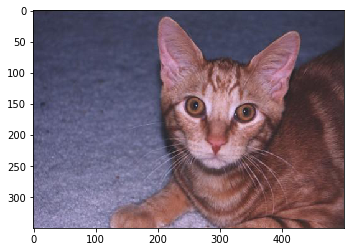

In [71]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("E:/data/test/cats/107.jpg",target_size=image_size[:2])

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model3.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('E:/data/test/cats/107.jpg')
imgplot = plt.imshow(img)
plt.show()


[[1.]]
Prediction:  Dog


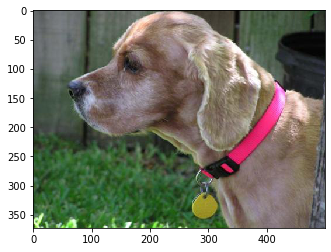

In [74]:
img_pred = image.load_img("E:/data/test/dogs/102.jpg",target_size=image_size[:2])

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('E:/data/test/dogs/102.jpg')
imgplot = plt.imshow(img)
plt.show()
